2024.08.02
<br> Allocating the number of hidden layers in the 'Initialize parameters' part

## Neural Network model
input data <- 조업편차분석
<br>input size <- (53, 7596)
<br>output data <- 'A10' feature

In [1]:
#import libraries
import numpy as np

#for loss graph visualization only
import matplotlib.pyplot as plt

In [2]:
# upload data file
file_dir = '조업편차분석.txt'

with open(file_dir, 'r') as f:
    input_data = [x.strip().split(' ')[1:] for x in f.readlines()]
    f.close()

In [3]:
input_data = np.array(input_data[1:])
np.shape(input_data)

(7596, 54)

In [4]:
# separate x and y (독립변수 / 종속변수('A10'))
y = input_data[:, 9].astype('float')
x = np.delete(input_data, np.s_[9:10], axis = 1).astype('float')

np.shape(x), np.shape(y)

((7596, 53), (7596,))

In [5]:
# train test split 7:3
def train_test_split(x, y, ratio=0.7):
    split_idx = int(len(x)*ratio)
    trainX = x[:split_idx]
    trainy = y[:split_idx]

    testX = x[split_idx:]
    testy = y[split_idx:]

    return trainX, testX, trainy, testy

### Define necessary functions
- Normalization
- Activation functions
- Initialize parameters
- Feedforward
- Backpropagation
- weight update

In [6]:
# normalization
def Standard(X):
    X_scaled = ( X - X.mean(axis=0) ) / X.std(axis=0)
    return X_scaled, X.mean(axis=0), X.std(axis=0)

def de_Standard(X_scaled, mean, std):
    X = ( X_scaled * std ) + mean
    return X

In [80]:
# sigmoid function
def sigmoid(x, derivative = False):
    if derivative == True:
        return x*(1-x)
    else:
        return 1 / (1 + np.exp(-x))

In [367]:
# initialize parameters
def initialize_parameters(input_size, hidden_size, output_size, hidden_layer_no):
    #np.random.seed(0)
    if len(hidden_size) == hidden_layer_no:
        weight_list = [[] for _ in range(hidden_layer_no+1)]
        bias_list = [[] for _ in range(hidden_layer_no+1)]
        for m in range(hidden_layer_no+1):
            if m == 0:
                # first hidden layer
                W = np.random.uniform(low = -1, high = 1, size=(hidden_size[m], input_size))
                # W = np.random.randn(hidden_size[m], input_size)
                b = np.zeros((hidden_size[m], 1))
                weight_list[m] = W #.append(W)
                bias_list[m] = b #.append(b)
            elif m == hidden_layer_no: #2
                # last hidden layer == output layer
                W = np.random.uniform(low = -1, high = 1, size=(output_size, hidden_size[m-1]))
                # W = np.random.randn(output_size, hidden_size[m-1])
                b = np.zeros((output_size, 1))
                weight_list[m] = W #.append(W)
                bias_list[m] = b #.append(b)
            else:
                # hidden layers
                W = np.random.uniform(low = -1, high = 1, size=(hidden_size[m], hidden_size[m-1]))
                # W = np.random.randn(hidden_size[m], hidden_size[m-1])
                b = np.zeros((hidden_size[m], 1))
                weight_list[m] = W #.append(W)
                bias_list[m] = b #.append(b)

        parameters = [weight_list, bias_list]

        return parameters
    
    else:
        print('Allocation of hidden layer node structure does not meet with number of hidden layer size')
        return False

In [368]:
# Feedforward
def forward_propagation(input_data, parameters, hidden_layer_no):
    # retrieve the parameters
    weights, biases = parameters
    z_list = [[] for _ in range(len(weights))]
    a_list = [[] for _ in range(len(weights))]
    
    for m in range(hidden_layer_no+1):
        if m==0:
            #first hidden layer
            Z = np.dot(weights[m], input_data.T) + biases[m]
            A = sigmoid(Z)
            z_list[m] = Z
            a_list[m] = A
            # z_list.append(Z)
            # a_list.append(A)
        elif m == hidden_layer_no:
            #last hidden layer -> output layer
            Z = np.dot(weights[m], A) + biases[m]
            A = Z # linear
            z_list[m] = Z
            a_list[m] = A
            # z_list.append(Z)
            # a_list.append(Z) #A
        else:
            #hidden layers
            Z = np.dot(weights[m], A) + biases[m]
            A = sigmoid(Z)
            z_list[m] = Z
            a_list[m] = A
            # z_list.append(Z)
            # a_list.append(Z)

    
    cache = [z_list, a_list]
    
    return Z, cache

In [369]:
# Backpropagation
def backpropagation(parameters, cache, X, y, hidden_layer_no):
    j = y.shape[0] # number of input data

    # retrieve the intermediate values
    _, a_list = cache

    dw_list = [[] for _ in range(len(a_list))]
    db_list = [[] for _ in range(len(a_list))]

    for m in range(hidden_layer_no, -1, -1): #backwards calculation
        if m == hidden_layer_no:
            #output layer backpropagation
            dA = a_list[m] - y
            dZ = dA  # linear function derivative
            dW = (1/j) * np.dot(dZ, a_list[m-1].T)
            db = (1/j) * np.sum(dZ, axis=1, keepdims=True)
            dw_list[m] = dW #.append(dW)
            db_list[m] = db #.append(db)
            # dw_list.insert(0, dW)
            # db_list.insert(0, db)
        elif m == 0:
            # first hidden layer backpropagation *into input layer
            # dZ2 = dA * (a_list[m+1] * (1-a_list[m+1]))
            dA = np.dot(parameters[0][m+1].T, dZ) #parameters[2] == W2  
            dZ = dA * sigmoid(a_list[m], derivative=True) #(a_list[m] * (1-a_list[m]))
            dW = (1/j) * np.dot(dZ, X)
            db = (1/j) * np.sum(dZ, axis=1, keepdims=True)
            dw_list[m] = dW #.append(dW)
            db_list[m] = db #.append(db)
            # dw_list.insert(0, dW)
            # db_list.insert(0, db)
        else:
            # dZ2 = dA * (a_list[m+1] * (1-a_list[m+1]))
            dA = np.dot(parameters[0][m+1].T, dZ) #parameters[2] == W2  
            dZ = dA * sigmoid(a_list[m], derivative=True) #(a_list[m] * (1-a_list[m]))
            dW = (1/j) * np.dot(dZ, a_list[m-1].T)
            db = (1/j) * np.sum(dZ, axis=1, keepdims=True)
            dw_list[m] = dW #.append(dW)
            db_list[m] = db #.append(db)
            # dw_list.insert(0, dW)
            # db_list.insert(0, db)

    gradients = [dw_list, db_list]

    return gradients
    

In [370]:
# update parameters
def update_parameters(parameters, gradients, learning_rate, hidden_layer_no):
    # retrieve the gradients
    dw_list, db_list = gradients
    
    # retrieve the weights and biases
    weight_list, bias_list = parameters
    
    # update the weights and biases
    for m in range(hidden_layer_no+1):
        weight_list[m] -= learning_rate*dw_list[m]
        bias_list[m] -= learning_rate*db_list[m]
    
    parameter = [weight_list, bias_list]
    
    return parameter

In [371]:
# MSE loss function
def MSE(y_pred, y_true):
    total_error = np.sum((y_pred - y_true)**2)
    return total_error / len(y_true)

# MAE loss function
def MAE(y_pred, y_true):
    total_error = np.sum(np.abs(y_pred - y_true))
    return total_error / len(y_true)

In [372]:
# accuracy calculation
# https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html
def r_squared(y_pred, y_true):
    ssr = np.sum((y_pred-y_true)**2)
    sst = np.sum((y_true.mean()-y_true)**2)
    return 1- (ssr/sst)

## Total model layout

In [422]:
# data preprocessing
x_scaled, X_mean, X_std = Standard(x)
y_scaled, y_mean, y_std = Standard(y)
trainX, testX, trainy, testy = train_test_split(x_scaled, y_scaled)
trainX.shape, testX.shape, trainy.shape, testy.shape

((5317, 53), (2279, 53), (5317,), (2279,))

In [423]:
# hyperparameter settings
learning_rate = 0.1
epochs = 500

In [424]:
# training
mse = []
rs = []
mae = []
input_size = trainX.shape[1]
hidden_size = [20, 20]
output_size = 1
hidden_layer_no = 2
parameters = initialize_parameters(input_size, hidden_size, output_size, hidden_layer_no)


for epoch in range(epochs):
    A2, cache = forward_propagation(trainX, parameters, hidden_layer_no)

    # calculate loss
    A2 = np.squeeze(A2)
    loss = MSE(A2, trainy)
    loss_2 = MAE(A2, trainy)
    acc = r_squared(A2, trainy)
    mse.append(loss)
    mae.append(loss_2)
    rs.append(acc)

    gradients = backpropagation(parameters, cache, trainX, trainy, hidden_layer_no)
    parameters = update_parameters(parameters, gradients, learning_rate, hidden_layer_no)

    if epoch == 1 or epoch % 100 == 99:
        print(f'MSE for epoch # {epoch+1} : {loss} \t r-squared : {acc}')

MSE for epoch # 2 : 0.8288406320323857 	 r-squared : -0.1717843063067077
MSE for epoch # 100 : 0.37722965371849027 	 r-squared : 0.466686633090197
MSE for epoch # 200 : 0.29170620367465994 	 r-squared : 0.5875965314585124
MSE for epoch # 300 : 0.24659716361270814 	 r-squared : 0.6513700280443921
MSE for epoch # 400 : 0.2166085711582105 	 r-squared : 0.6937667936569099
MSE for epoch # 500 : 0.19434346457541893 	 r-squared : 0.7252443798944315


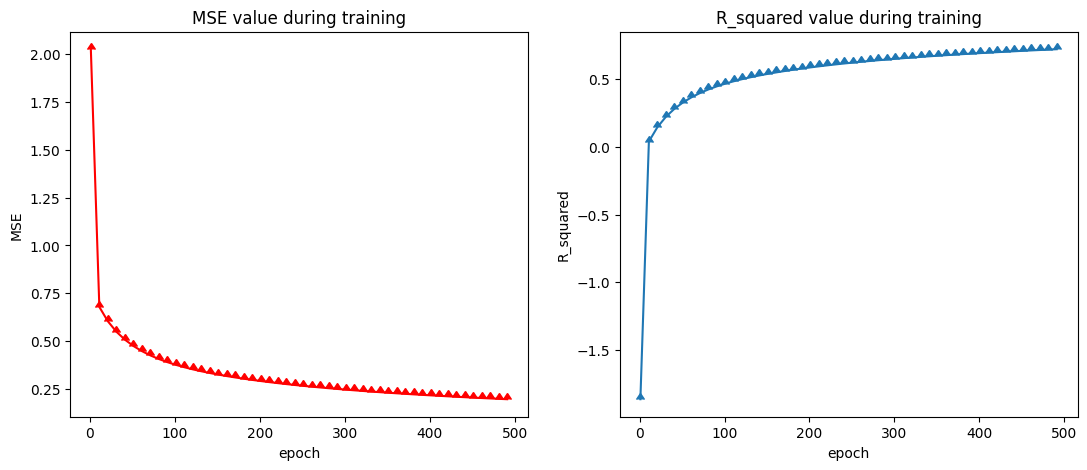

R-square	:	0.7252443798944315
RMAE		:	0.4408440365655624
MAE		:	0.19434346457541893


In [425]:
# visualize loss graph
visual_pts = 10

plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.plot(np.arange(1,len(mse)+1, visual_pts), mse[::visual_pts], marker=10, color = 'r')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('MSE value during training')

plt.subplot(1,2,2)
plt.plot(np.arange(1,len(rs)+1, visual_pts), rs[::visual_pts], marker=10)
plt.xlabel('epoch')
plt.ylabel('R_squared')
plt.title('R_squared value during training')
plt.show()

print(f'R-square\t:\t{rs[np.argmax(rs)]}\nRMAE\t\t:\t{np.sqrt(mse[np.argmin(mse)])}\nMAE\t\t:\t{mse[np.argmin(mae)]}')

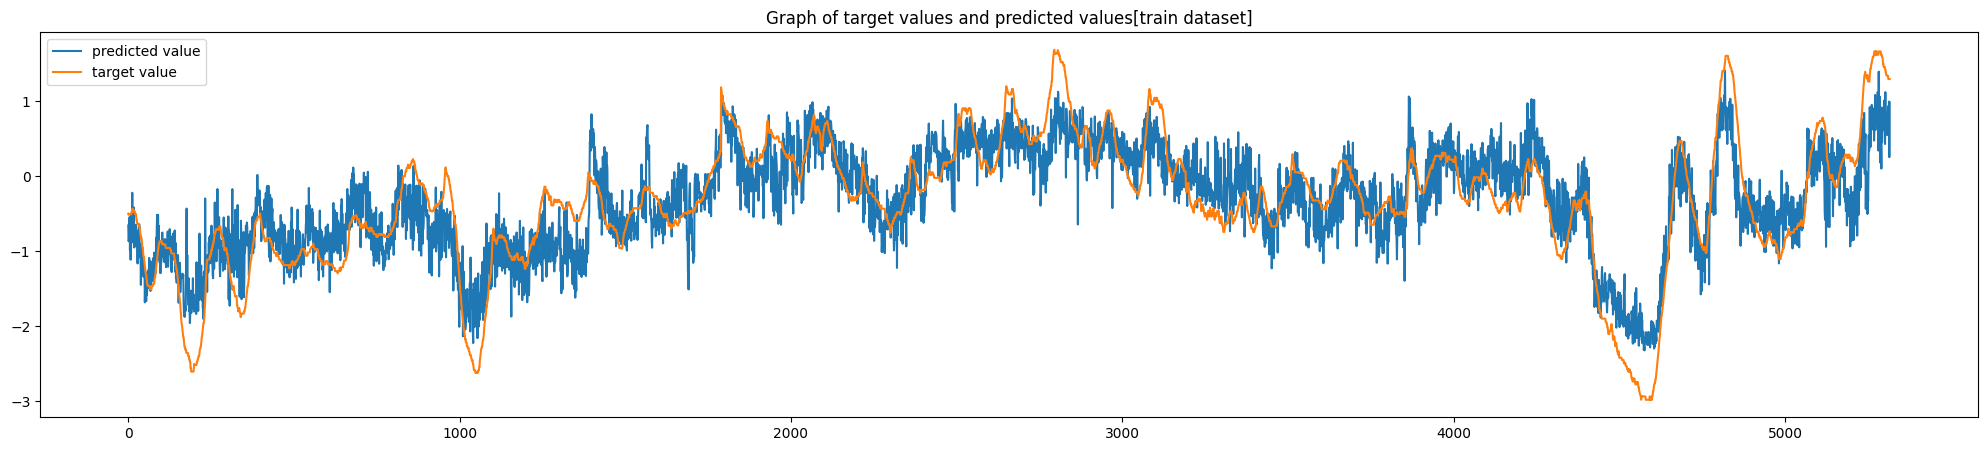

In [426]:
# visualization of model output values
plt.figure(figsize=(25,5))
# plt.xlabel('Data index number')
# plt.ylabel('Feature [A10] value')

# plt.subplot(1,2,1)
plt.plot(A2, label = 'predicted value')
plt.plot(trainy, label = 'target value')
plt.title('Graph of target values and predicted values[train dataset]')
plt.legend()

# plt.subplot(1,2,2)
# plt.plot(A2[0])
# plt.title('Graph of predicted values[train dataset]')
plt.show()

In [427]:
# testing
# retrieve the  parameters
tweights, tbias = parameters

# compute the activation of the hidden layer
for m in range(hidden_layer_no+1):
    if m == 0:
        tZ = np.dot(tweights[m], x_scaled.T) + tbias[m]
        tA = sigmoid(tZ)
    elif m == hidden_layer_no:
        tZ = np.dot(tweights[m], tA) + tbias[m]
        tA = tZ
    else:
        tZ = np.dot(tweights[m], tA) + tbias[m]
        tA = sigmoid(tZ)

tloss = MSE(tA, y_scaled)

unscaled_y_true = de_Standard(y_scaled, y_mean, y_std)
unscaled_y_pred = de_Standard(tA, y_mean, y_std)

print(f'MSE for test dataset : {tloss}')

MSE for test dataset : 0.7153893731553415


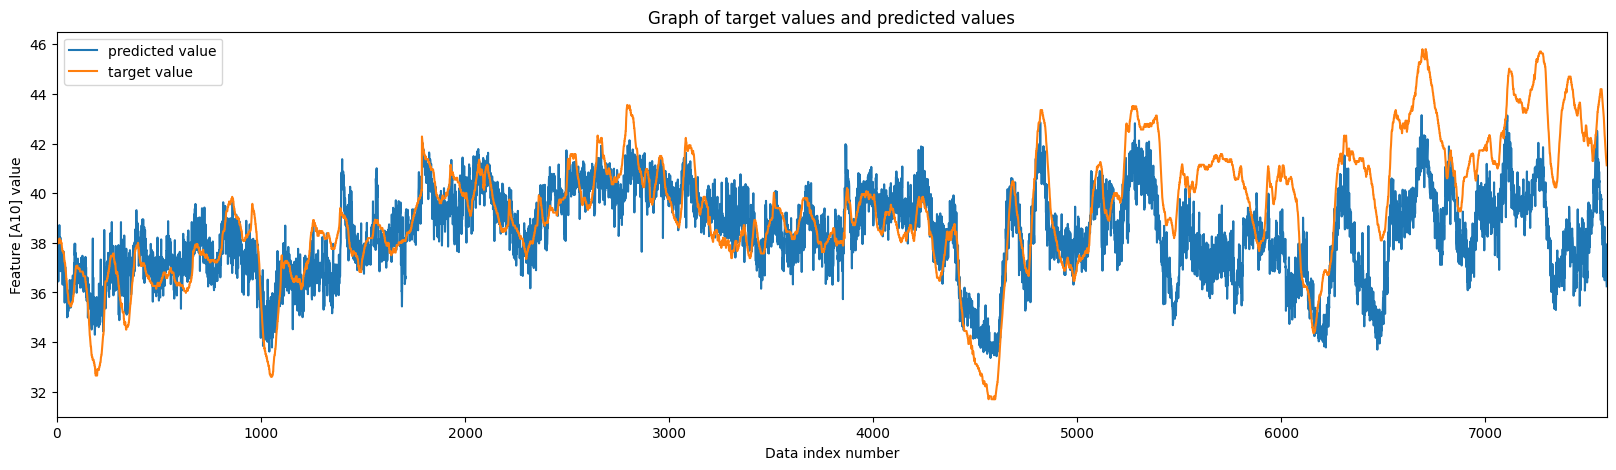

In [428]:
# visualization of model output values and the target values
plt.figure(figsize=(20,5))
plt.xlabel('Data index number')
plt.ylabel('Feature [A10] value')
plt.title('Graph of target values and predicted values')
plt.plot(unscaled_y_pred[0], label = 'predicted value')
plt.plot(unscaled_y_true, label = 'target value')
plt.xlim([0, len(unscaled_y_true)])
plt.legend()
plt.show()

In [429]:
len(parameters[0])

3

In [354]:
parameters[0]

[array([[ 4.74755500e-01, -5.94451247e-01,  8.42207564e-01,
          1.84576843e+00, -8.85843706e-02,  1.68360872e+00,
         -1.66958385e+00,  3.82192669e-01,  4.39074660e-01,
         -6.77892339e-01, -6.82593792e-03,  1.14446054e-01,
          6.08957948e-01,  4.71823403e-01,  3.24986800e-02,
          7.32286430e-01, -4.56121121e-02, -1.18495695e+00,
          3.88118727e-01,  4.29828845e-01,  2.35235232e-01,
         -2.83607964e-01,  2.34214353e+00, -6.28118053e-01,
         -4.68410518e-01, -9.38477847e-01,  1.35033069e+00,
          6.20443962e-01, -9.30045364e-01, -2.55344034e-01,
          6.84301503e-01,  1.41604154e-01,  3.22382377e-01,
          1.81313712e-01, -2.86487275e-01,  6.92674735e-01,
          1.33521200e+00, -9.76431394e-01, -1.66689597e+00,
          1.63716543e-01, -1.21612434e+00, -1.97665642e-01,
          1.04092902e+00, -6.89231582e-01,  1.40110472e+00,
          4.76881338e-01, -1.45499524e+00, -1.48417647e+00,
          1.82051067e-01, -8.95951602e-0